# Penguin Species Detection

This project aims to predict the species of the penguins based on their gender, island where they were found and their body characteristics.

## Steps

* Libraries Importing 
* Data Importing 
* Data Wrangling
* Data Visualization
* Model Creation and Prediction

# Libraries Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing

In [3]:
penguin_df = pd.read_csv("penguins_size.csv")

In [5]:
penguin_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Data Wrangling

In [6]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguin_df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
penguin_df = penguin_df.dropna(subset=["sex"])

In [11]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [12]:
penguin_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [14]:
penguin_df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
penguin_df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
penguin_df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [17]:
penguin_df = penguin_df[penguin_df["sex"] != "."]

In [18]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [19]:
penguin_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Data Visualization

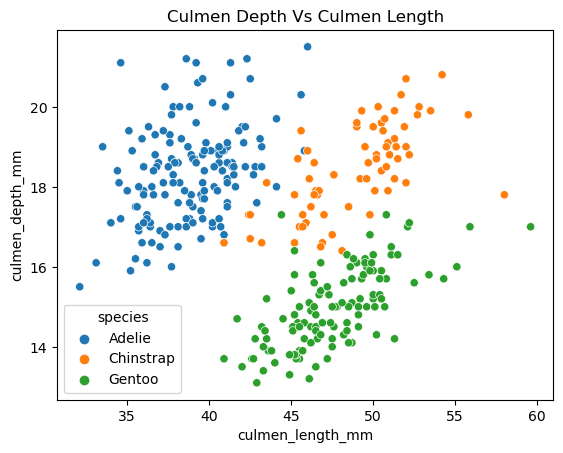

In [22]:
sns.scatterplot(data=penguin_df, x="culmen_length_mm", y="culmen_depth_mm", hue="species")
plt.title("Culmen Depth Vs Culmen Length");

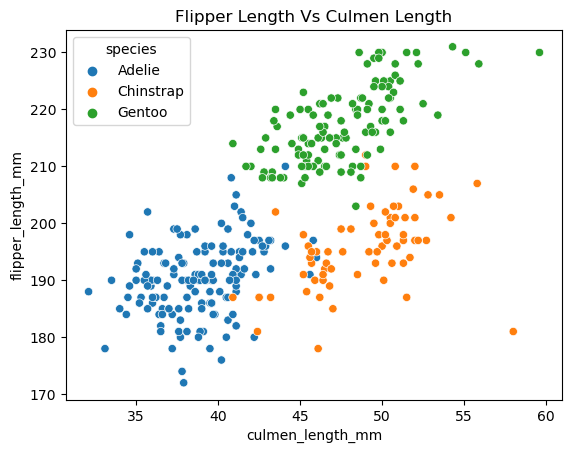

In [23]:
sns.scatterplot(data=penguin_df, x="culmen_length_mm", y="flipper_length_mm", hue="species")
plt.title("Flipper Length Vs Culmen Length");

We can see a good amount of distinction between the species and theier means

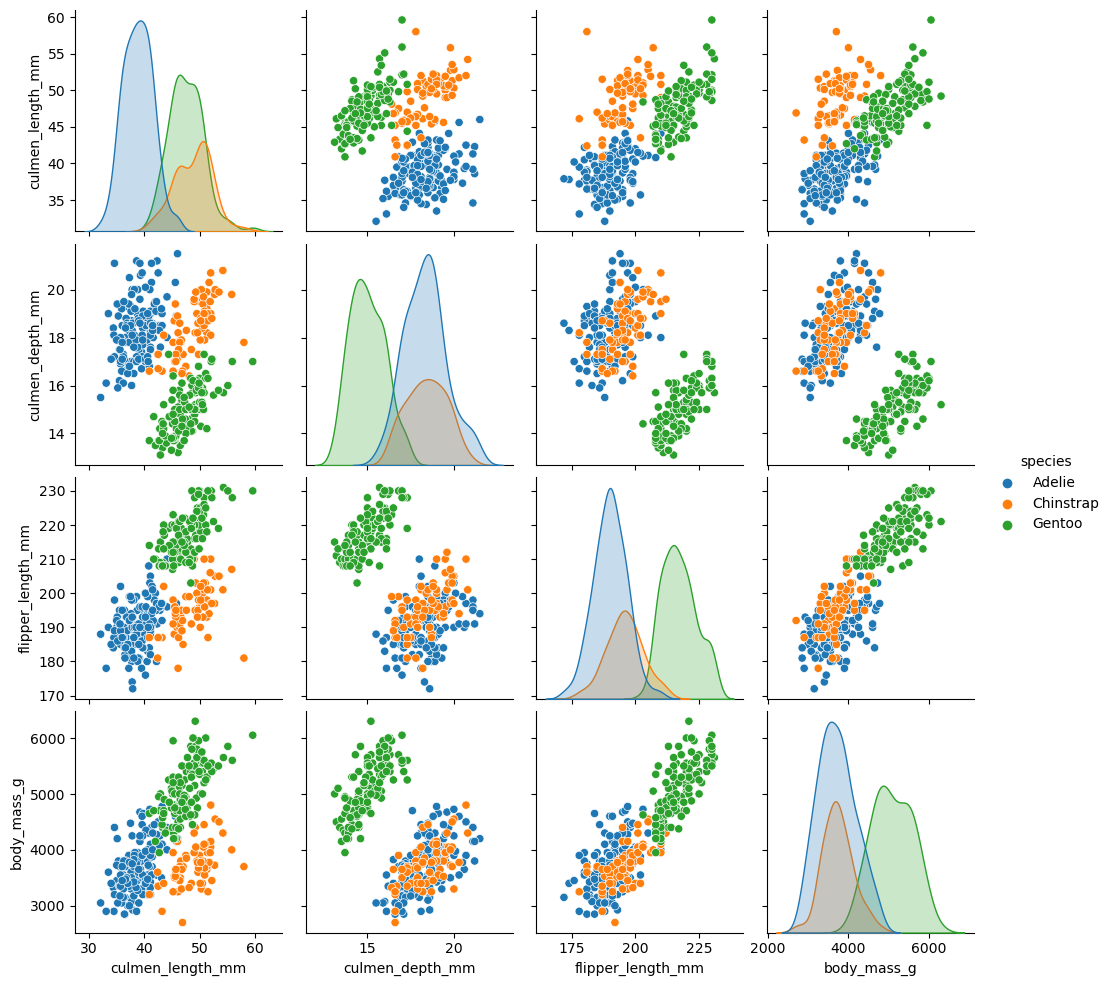

In [24]:
sns.pairplot(data=penguin_df, hue="species")

The observation of the distribution of the variables can be observed with means similarities and distinctions

# Model Creation and Prediction

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

In [26]:
X = pd.get_dummies(data=penguin_df.drop(["species"], axis=1), drop_first=True)
y = penguin_df["species"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
tree_model = DecisionTreeClassifier()

In [30]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
tree_predict = tree_model.predict(X_test)

In [33]:
print("\nDecision Trees\n",classification_report(y_test,tree_predict))


Decision Trees
               precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [34]:
cmd_tree = confusion_matrix(y_test, tree_predict)

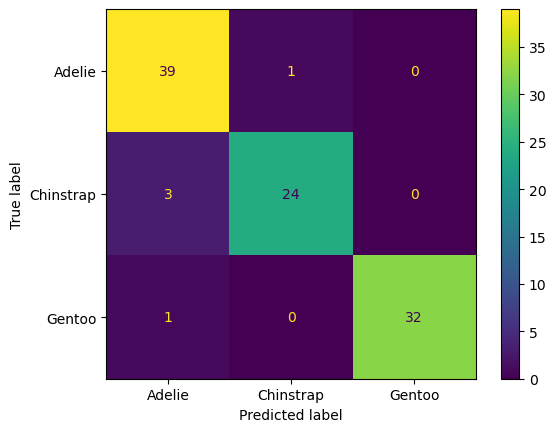

In [37]:
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)

In [38]:
tree_model.feature_importances_

array([0.34035881, 0.04582245, 0.57575804, 0.        , 0.03806069,
       0.        , 0.        ])

In [39]:
tree_model.feature_names_in_

array(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype=object)

In [40]:
pd.DataFrame(index=tree_model.feature_names_in_, data=tree_model.feature_importances_, columns=["Feature_Importance"])

,Feature_Importance
culmen_length_mm,0.340359
culmen_depth_mm,0.045822
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.000000


In [41]:
from sklearn.tree import plot_tree

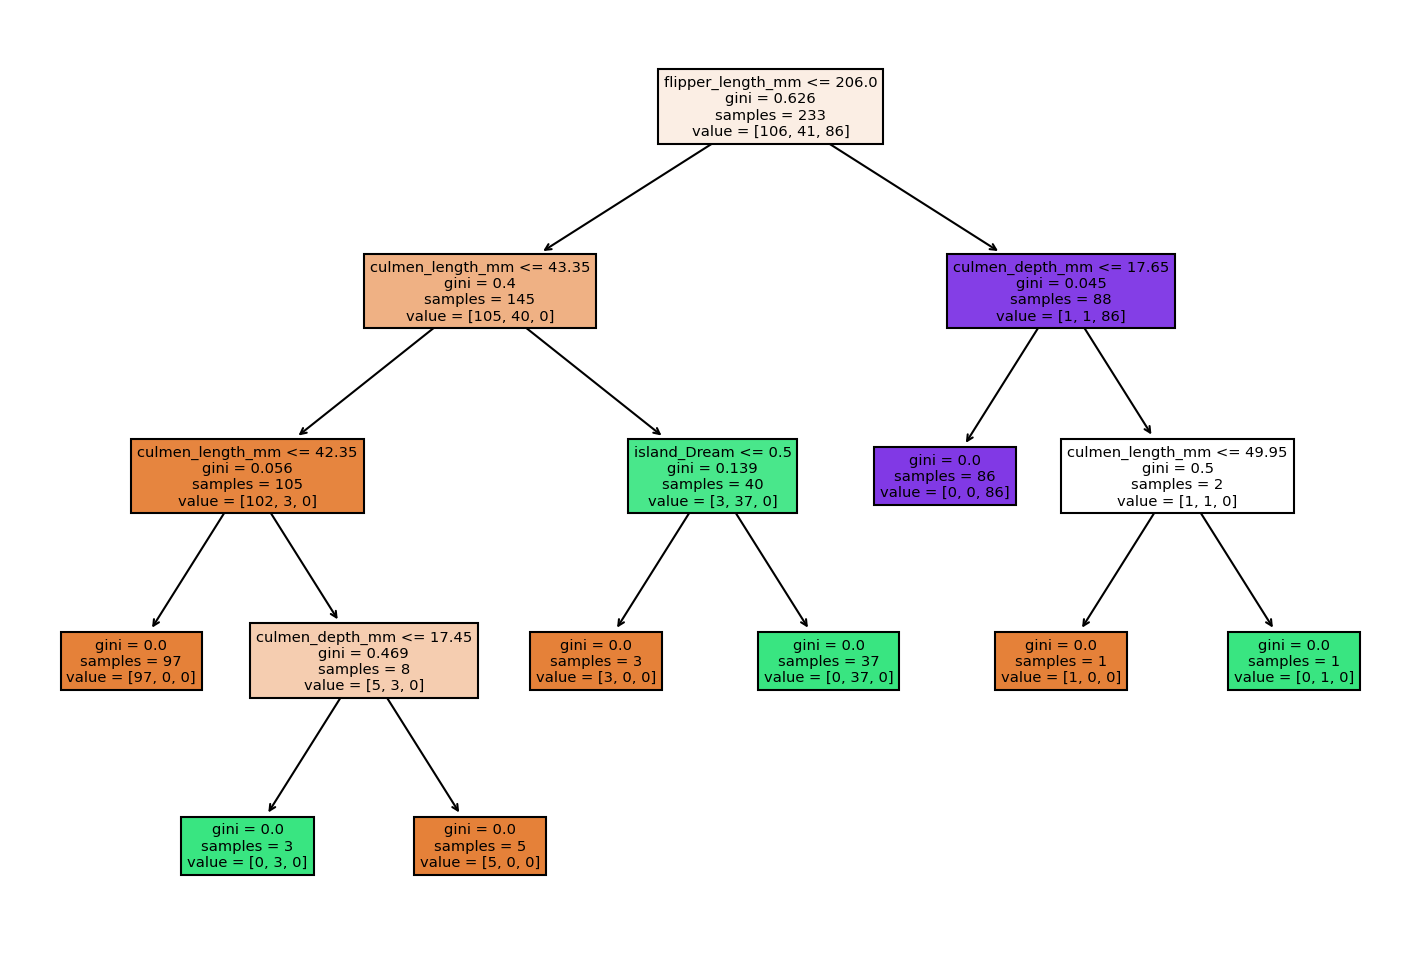

In [42]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree_model,filled=True,feature_names=X.columns);